
# **Lab1: Tìm hiều về thuật toán FFT và ứng dụng FFT-PSD để lọc nhiễu trên tín hiệu**




## Phần 1: Viết code tính toán DFT, FFT theo các cách khác nhau:

DFT là Fourier rời rạc của tín hiệu x(n); được tính theo công thức:
$$ X [k] = \sum_{k=0}^{N-1} x[n].e^{-J.2pi.kn/N} $$
IDFT là biến đổi  ngược của DFT, chuyển đổi từ tần số sang thời gian. Công thức của DFT là:
$$ x [n] = (1/N) \sum_{k=0}^{N-1} X[k].e^{J.2pi.kn/N} $$

In [8]:
# Sử dụng định nghĩa bên trên viết code tính toán DFT và IDFT của một tín hiệu x(n), có chiều dài N bất kỳ.
# Code here
import numpy as np
import time
# Function to compute the Discrete Fourier Transform (DFT)
def DFT(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)  # Initialize output array with complex zeros
    # Nested loop to calculate DFT
    # Loop over each frequency bin (output component)
    for k in range(N):
      # Loop over each time-domain sample (input signal)
        for n in range(N):
            # DFT formula: Sum over all input samples
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

# Function to compute the Inverse Discrete Fourier Transform (IDFT)
def IDFT(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)  # Initialize output array for the reconstructed time-domain signal
    # Nested loop to calculate IDFT
      # Loop over each time-domain sample (output component)
    for n in range(N):
      # Loop over each frequency bin (input component)
        for k in range(N):
            # IDFT formula: Sum over all frequency components
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)
        x[n] /= N
    return x
# Example usage of the DFT function and the IDFT function
x = [1, 2, 3, 4]
X_DFT = DFT(x)
x_IDFT = IDFT(X_DFT)

print("Input signal:", x)
print("DFT signal:", X_DFT)
print("IDFT signal:", x_IDFT)

# Tăng dần chiều dài tín hiệu lên, tính toán thời gian thực hiện.
signal_lengths = [10, 100, 500, 1000, 2000, 5000, 10000]

# Loop over different signal lengths
for N in signal_lengths:
    # Generate a random signal of length N
    x = np.random.rand(N)

    # Time the DFT
    start_time = time.time()
    X_dft = DFT(x)  # Compute DFT
    dft_time = time.time() - start_time  # Calculate the time taken

    # Time the IDFT
    start_time = time.time()
    x_IDFT = IDFT(X_dft)  # Compute IDFT
    idft_time = time.time() - start_time  # Calculate the time taken

    # Print the results
    print(f"Signal length: {N}")
    print(f"DFT time: {dft_time:.3f} seconds")
    print(f"IDFT time: {idft_time:.3f} seconds")
    print("*" * 30)

Input signal: [1, 2, 3, 4]
DFT signal: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
IDFT signal: [1.-5.55111512e-16j 2.-2.77555756e-16j 3.-1.11022302e-16j
 4.+2.77555756e-16j]
Signal length: 10
DFT time: 0.000 seconds
IDFT time: 0.000 seconds
******************************
Signal length: 100
DFT time: 0.019 seconds
IDFT time: 0.018 seconds
******************************
Signal length: 500
DFT time: 0.457 seconds
IDFT time: 0.423 seconds
******************************
Signal length: 1000
DFT time: 1.796 seconds
IDFT time: 1.705 seconds
******************************
Signal length: 2000
DFT time: 8.362 seconds
IDFT time: 6.755 seconds
******************************
Signal length: 5000
DFT time: 50.045 seconds
IDFT time: 47.694 seconds
******************************
Signal length: 10000
DFT time: 196.154 seconds
IDFT time: 188.432 seconds
******************************



Để thực hiện tính toán DFT nhanh hơn, phương pháp FFT ra đời. FFT cơ bản nhất là sử dụng phương pháp đệ quy.

1. FFT(a) { //1Darray a=(a0,a1,...,an-1)
2. n=length(a) //nisapowerof2
3. if(n==1)
4. return a
6. ωn = e2πi/n
7. ω=1
8. a[0]=(a0,a2,a4,...an-2)
9. a[1]=(a1,a3,a5,...an-1)
19. y[0] = FFT(a[0])
11. y[1] = FFT(a[1])
12. for (k=0; k <= n/2-1; k++) {
13. yk = yk[0] + ω yk[1]
14. yk+(n/2) = yk[0] - ω yk[1]
15. w = ω wn
16. }
17. return y // y is vector, |y| = n }









In [29]:
import numpy as np
#Recursive FFT
def FFT(a):
    n = len(a)

    # Base case: if input array has only one element, return it
    if n == 1:
        return a
    # Calculate the nth root of unity
    omega_n = np.exp(-2j * np.pi / n)
    omega = 1

    # Split the input array into even and odd indices
    a_even = a[0::2]
    a_odd = a[1::2]

    # Recursive calls on even and odd parts
    y_even = FFT(a_even)
    y_odd = FFT(a_odd)

    # Combine the results using the butterfly operation
    y = np.zeros(n, dtype=complex)
    for k in range(n//2):
        y[k] = y_even[k] + omega * y_odd[k]
        y[k + n//2] = y_even[k] - omega * y_odd[k]
        omega *= omega_n  # Update omega for next iteration

    return y
#Recursive IFFT
def IFFT(a):
    n = len(a)

    # Base case: if input array has only one element, return it
    if n == 1:
        return a
    # Calculate the nth root of unity (note the positive exponent for IFFT)
    omega_n = np.exp(2j * np.pi / n)
    omega = 1

    # Split the input array into even and odd indices
    a_even = a[0::2]
    a_odd = a[1::2]

    # Recursive calls on even and odd parts
    y_even = IFFT(a_even)
    y_odd = IFFT(a_odd)

    # Combine the results using the butterfly operation
    y = np.zeros(n, dtype=complex)
    for k in range(n//2):
        y[k] = y_even[k] + omega * y_odd[k]
        y[k + n//2] = y_even[k] - omega * y_odd[k]
        omega *= omega_n  # Update omega for next iteration

    # Scale the output by 1/2 at each recursive level
    return y / 2

# Example usage:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])
fft_result = FFT(a)
print("FFT result:", fft_result)

ifft_result = IFFT(fft_result)
print("IFFT result:", ifft_result)


FFT result: [36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
IFFT result: [1.+0.00000000e+00j 2.-2.71834567e-16j 3.+4.44089210e-16j
 4.+3.82856870e-16j 5.+0.00000000e+00j 6.-4.97899625e-17j
 7.-4.44089210e-16j 8.-6.12323400e-17j]


Bên cạnh phương pháp đệ quy, ta có thể dùng phương pháp lặp để tính FFT trực tiếp theo hình sơ đồ kết quả có được, khi thực hiện đệ quy. Phương pháp này còn gọi là radix-2
Đọc thêm về phương pháp ở đây https://www.phys.uconn.edu/~rozman/Courses/m3511_19s/downloads/radix2fft.pdf

In [30]:
# Dựa theo thông tin bên trên viết code tính FFT cho 16 số theo phương pháp radix 2 bên trên
#FFT16
# Code here...
import numpy as np

def FFT16(x):

    # Ensure input is a numpy array
    x = np.asarray(x, dtype=complex)

    # Bit-reversal permutation
    y = np.zeros(16, dtype=complex)
    for i in range(16):
        rev_i = int(format(i, '04b')[::-1], 2)  # Reverse 4-bit binary
        y[i] = x[rev_i]

    # Butterfly operations
    # Stage 1: 8 butterflies with stride 8
    for i in range(0, 16, 2):
        temp = y[i]
        y[i] = temp + y[i+1]
        y[i+1] = temp - y[i+1]

    # Stage 2: 4 butterflies with stride 4
    w_4 = np.exp(-2j * np.pi / 4)  # Twiddle factor for N=4
    for i in range(0, 16, 4):
        temp = y[i]
        y[i] = temp + y[i+2]
        y[i+2] = temp - y[i+2]
        temp = y[i+1]
        y[i+1] = temp + y[i+3] * w_4
        y[i+3] = temp - y[i+3] * w_4

    # Stage 3: 2 butterflies with stride 2
    w_8 = np.exp(-2j * np.pi / 8)  # Twiddle factor for N=8
    w_8_3 = w_8 ** 3
    for i in range(0, 16, 8):
        temp = y[i]
        y[i] = temp + y[i+4]
        y[i+4] = temp - y[i+4]
        temp = y[i+1]
        y[i+1] = temp + y[i+5] * w_8
        y[i+5] = temp - y[i+5] * w_8
        temp = y[i+2]
        y[i+2] = temp + y[i+6] * w_8 ** 2
        y[i+6] = temp - y[i+6] * w_8 ** 2
        temp = y[i+3]
        y[i+3] = temp + y[i+7] * w_8_3
        y[i+7] = temp - y[i+7] * w_8_3

    # Stage 4: 1 butterfly with stride 1
    w_16 = np.exp(-2j * np.pi / 16)  # Twiddle factor for N=16
    for i in range(8):
        temp = y[i]
        y[i] = temp + y[i+8] * w_16 ** i
        y[i+8] = temp - y[i+8] * w_16 ** i

    return y

# Example usage
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
result = FFT16(x)
print("FFT16 result:")
for i, val in enumerate(result):
    print(f"X[{i}] = {val:.4f}")




FFT16 result:
X[0] = 136.0000+0.0000j
X[1] = -8.0000+40.2187j
X[2] = -8.0000+19.3137j
X[3] = -8.0000+11.9728j
X[4] = -8.0000+8.0000j
X[5] = -8.0000+5.3454j
X[6] = -8.0000+3.3137j
X[7] = -8.0000+1.5913j
X[8] = -8.0000+0.0000j
X[9] = -8.0000-1.5913j
X[10] = -8.0000-3.3137j
X[11] = -8.0000-5.3454j
X[12] = -8.0000-8.0000j
X[13] = -8.0000-11.9728j
X[14] = -8.0000-19.3137j
X[15] = -8.0000-40.2187j


## Phần 2: Làm quen với python và các thư viện có công cụ fft; sử dụng nó để phân tích tín hiệu trong miền tần số

fft có trong thư viện numpy.fft, scipy.fft và cả scipy.fftpack. SV đọc API các thư viện này ở đây:
https://numpy.org/doc/stable/reference/routines.fft.html

https://docs.scipy.org/doc/scipy/tutorial/fft.html

https://docs.scipy.org/doc/scipy/reference/fftpack.html

Tìm hiều xem các khác biệt hay lưu ý khi sử dụng các thư viện này?

In [ ]:
# Ví dụ về sử dụng fft có sẵn:

In [ ]:
# FFT có trong thư viện scipy:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy.io import wavfile
from scipy.signal import periodogram as periodogram_f
from scipy.fft import fft, ifft, fftfreq, fftshift

from cmath import exp, pi


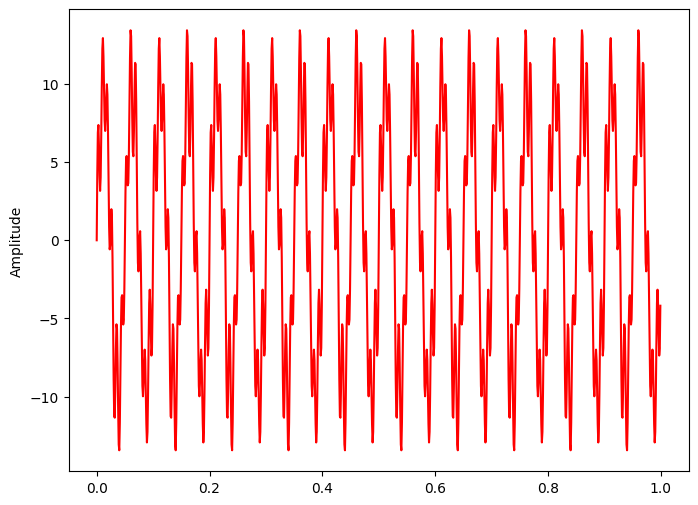

In [37]:
import matplotlib.pyplot as plt
import numpy as np
Fs = 1000
# sampling interval
ts = 1.0/Fs
t = np.arange(0,1,ts)

freq1 = 20
freq2 = 90
freq3 = 120

x = 10*np.sin(2*np.pi*freq1*t) + np.sin(2*np.pi*freq2*t) + 3.5* np.sin(2*np.pi*freq3*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


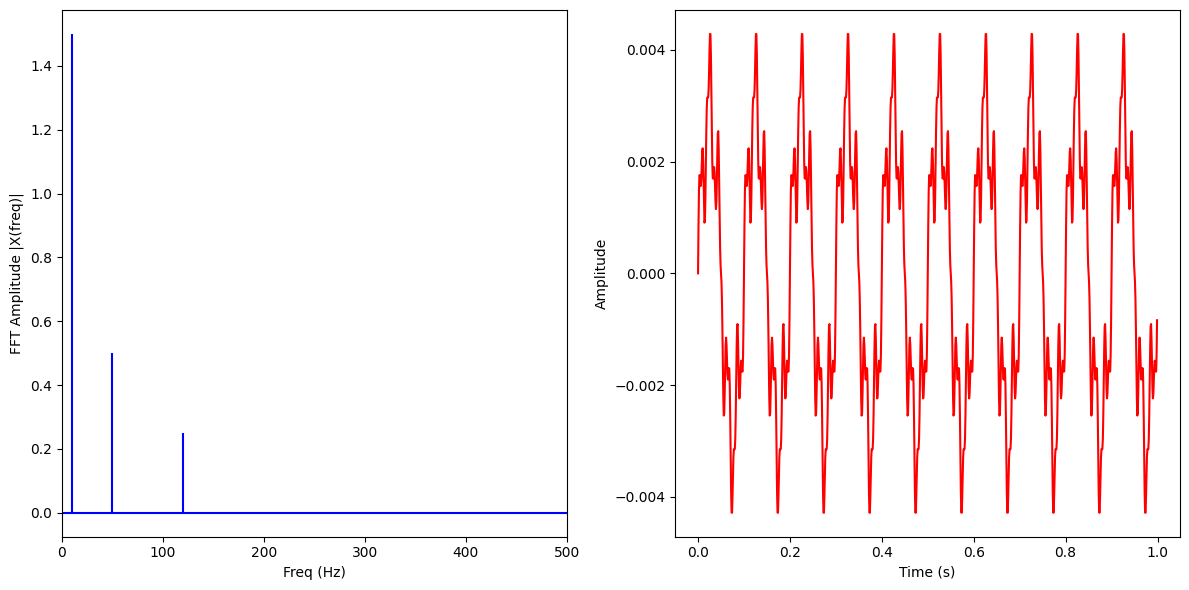

In [ ]:
# Sử dụng hàm FFT và IFFT trong scipy:

X = fft(x)/N
N = len(X)
n = np.arange(N)
T = N/Fs

freq = n/T

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, Fs/2)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

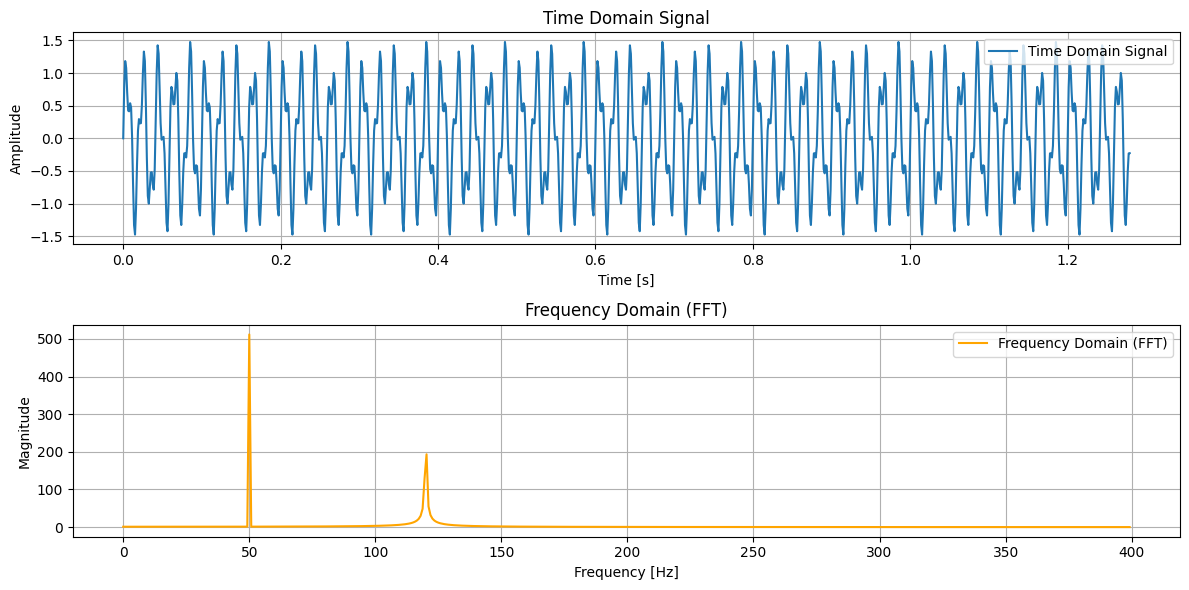

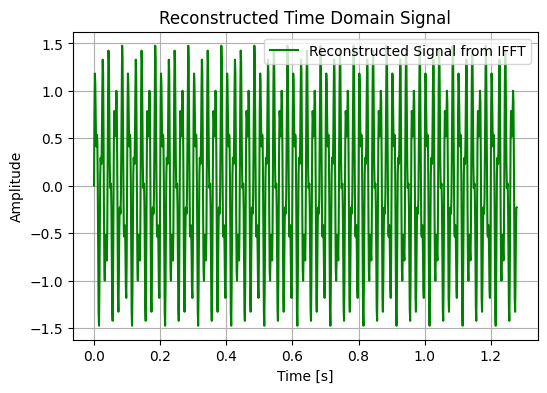

In [39]:
# Trong thư viện scipy.fftpack cũng có hàm FFT và IFFT
# Hoàn thiện code ở đây:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

# Generate a sample signal
# Time domain: A sum of two sinusoids
N = 1024  # Number of sample points
T = 1.0 / 800.0  # Sample spacing (sampling rate)
x = np.linspace(0.0, N * T, N, endpoint=False)
# Signal: a sum of two sinusoids (frequencies of 50Hz and 120Hz)
y = np.sin(50.0 * 2.0 * np.pi * x) + 0.5 * np.sin(120.0 * 2.0 * np.pi * x)

# Compute FFT
Y_fft = fft(y)

# Compute IFFT to reconstruct the signal
y_ifft = ifft(Y_fft)

# Plotting the signal in the time domain
plt.figure(figsize=(12, 6))

# Time domain (Original Signal)
plt.subplot(2, 1, 1)
plt.plot(x, y, label='Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Time Domain Signal')
plt.grid(True)
plt.legend()

# Frequency domain (Magnitude Spectrum)
plt.subplot(2, 1, 2)
freqs = np.fft.fftfreq(N, T)  # Frequency bins
plt.plot(freqs[:N // 2], np.abs(Y_fft[:N // 2]), label='Frequency Domain (FFT)', color='orange')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Frequency Domain (FFT)')
plt.grid(True)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# Optional: Display reconstructed signal from IFFT
plt.figure(figsize=(6, 4))
plt.plot(x, y_ifft.real, label='Reconstructed Signal from IFFT', color='green')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Reconstructed Time Domain Signal')
plt.grid(True)
plt.legend()
plt.show()



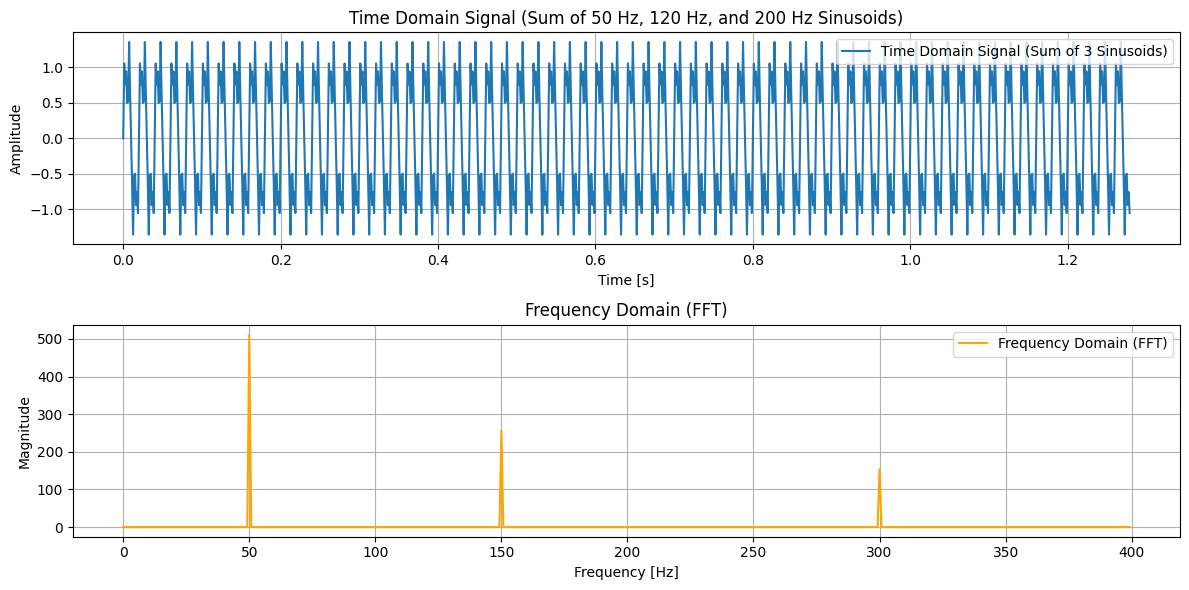

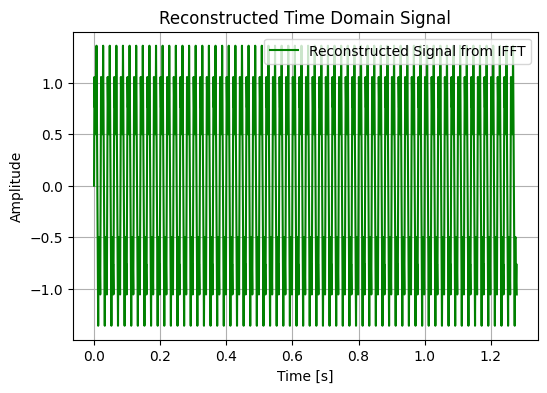

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal
N = 1024  # Number of sample points
T = 1.0 / 800.0  # Sample spacing (T = 1 / sampling_rate)
x = np.linspace(0.0, N * T, N, endpoint=False)  # Time axis

# Create a signal as the sum of three sinusoidal signals with different frequencies
y = (
    np.sin(50.0 * 2.0 * np.pi * x) +
    0.5 * np.sin(150.0 * 2.0 * np.pi * x) +
    0.3 * np.sin(300.0 * 2.0 * np.pi * x)
)

# Compute FFT (Fast Fourier Transform) using numpy's FFT function
Y_fft = np.fft.fft(y)

# Compute IFFT (Inverse Fast Fourier Transform) using numpy's IFFT function
y_ifft = np.fft.ifft(Y_fft)

# Plotting the signal in the time domain
plt.figure(figsize=(12, 6))

# Plot the original signal in the time domain (sum of three sinusoids)
plt.subplot(2, 1, 1)
plt.plot(x, y, label='Time Domain Signal (Sum of 3 Sinusoids)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Time Domain Signal (Sum of 50 Hz, 120 Hz, and 200 Hz Sinusoids)')
plt.grid(True)
plt.legend()

# Plot the magnitude of the FFT (frequency domain)
plt.subplot(2, 1, 2)
freqs = np.fft.fftfreq(N, T)  # Compute the frequencies corresponding to the FFT bins
plt.plot(freqs[:N // 2], np.abs(Y_fft[:N // 2]), label='Frequency Domain (FFT)', color='orange')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Frequency Domain (FFT)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Optional: Plot the reconstructed signal from IFFT
plt.figure(figsize=(6, 4))
plt.plot(x, y_ifft.real, label='Reconstructed Signal from IFFT', color='green')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Reconstructed Time Domain Signal')
plt.grid(True)
plt.legend()
plt.show()


##Phần 3: Ứng dụng FFT trong khử nhiễu của tín hiệu:
xem thêm video hướng dẫn và giải thích ở đây: https://www.youtube.com/watch?v=s2K1JfNR7Sc

In [ ]:
# Vẽ phổ tín hiệu bị nhiễu gauss trắng

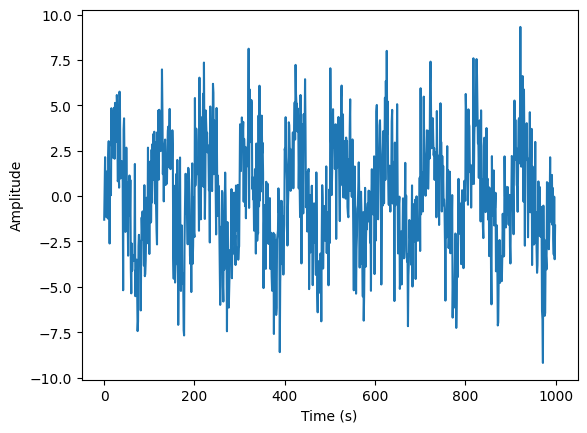

In [ ]:

noise= 2*np.random.randn(N)
x_noise = x+ noise
plt.plot(x_noise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()





(0.0, 500.0)

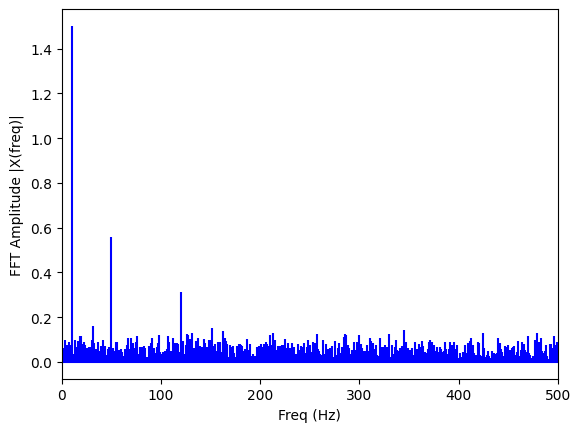

In [ ]:
# Ta cũng có thể phân tích phổ của tín hiệu bị nhiễu để quan sát dạng nhiễu gauss trắng :
X= fft(x_noise)/N
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, Fs/2)

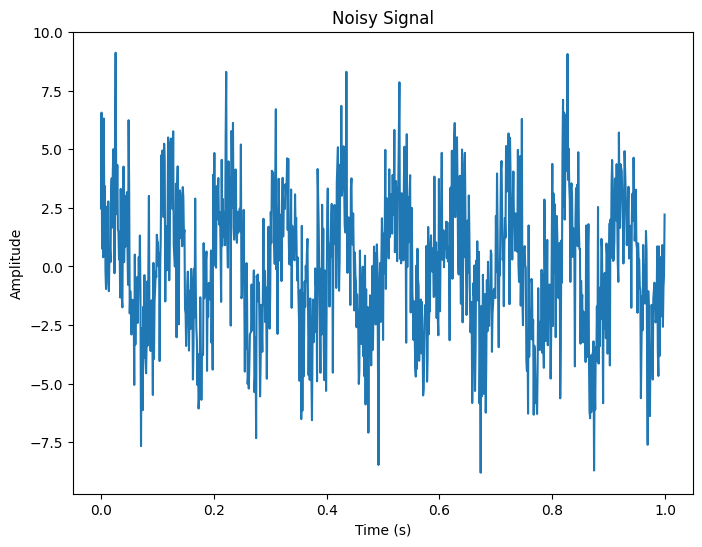

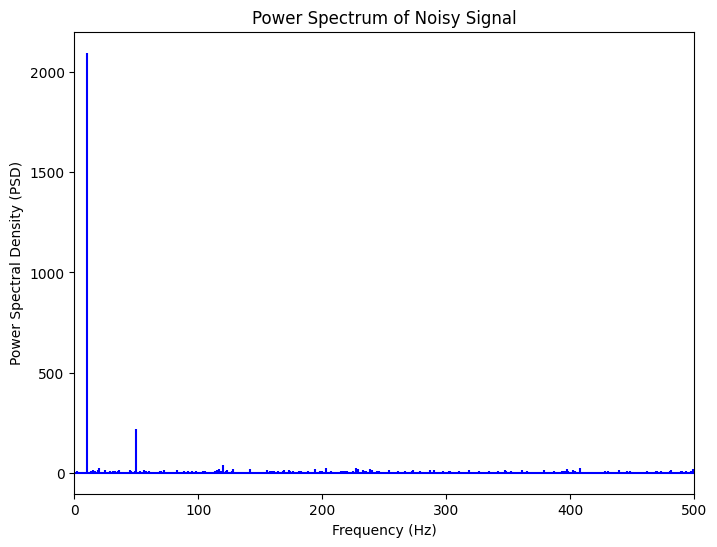

In [43]:
# Viết code tính phổ công suất PSD của tín hiệu trên:
# code here
#PSD = ......
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Sampling frequency
Fs = 1000
# Sampling interval
ts = 1.0 / Fs
t = np.arange(0, 1, ts)

# Frequencies
freq1 = 10
freq2 = 50
freq3 = 120

# Signal
x = 3 * np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t) + 0.5 * np.sin(2 * np.pi * freq3 * t)

# Add noise to the signal
N = len(t)
noise = 2 * np.random.randn(N)
x_noise = x + noise

# Plot noisy signal
plt.figure(figsize=(8, 6))
plt.plot(t, x_noise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Noisy Signal')
plt.show()

# Perform FFT on the noisy signal
X_noise = fft(x_noise)

# Compute power spectral density (PSD)
PSD = np.abs(X_noise) ** 2 / len(X_noise)

# Frequency axis
N = len(X_noise)
n = np.arange(N)
T = N / Fs
freq = n / T

# Plot power spectral density (PSD)
plt.figure(figsize=(8, 6))
plt.stem(freq, PSD, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.title('Power Spectrum of Noisy Signal')
plt.xlim(0, Fs / 2)  # Limit x-axis for better display
plt.show()


Ta có thể khử nhiễu bằng cách đặt ngưỡng cho PSD,các giá trị tần số PSD < threshold sẽ là nhiễu.
Sau đó tính lại ifft ; từ đó xác định lại tín hiệu sau khi đã lọc nhiễu:

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


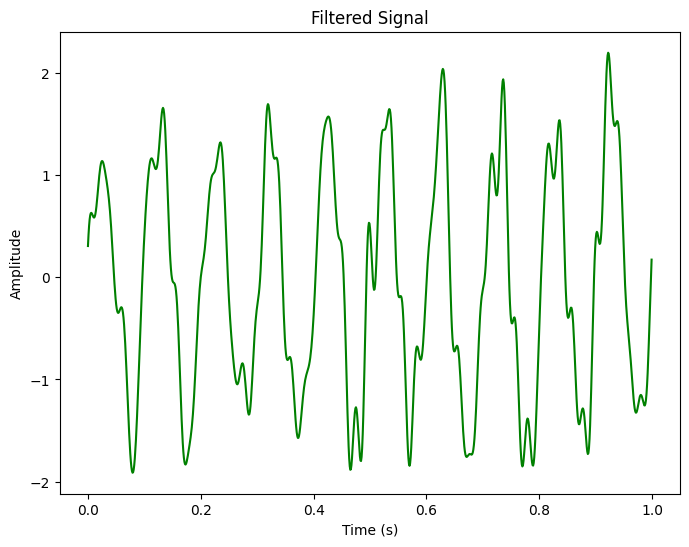

In [44]:



import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

# Sampling frequency
Fs = 1000
# Sampling interval
ts = 1.0 / Fs
t = np.arange(0, 1, ts)

# Frequencies
freq1 = 10
freq2 = 150

# Signal
x = 3 * np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

# Add noise to the signal
N = len(t)
noise = 2 * np.random.randn(N)
x_noise = x + noise

# Perform FFT on the noisy signal
X_noise = fft(x_noise)

# Frequency axis
N = len(X_noise)
n = np.arange(N)
T = N / Fs
freq = n / T

# Create a low-pass filter to remove noise
cutoff_freq = 50  # Cutoff frequency (Hz)
X_denoise = np.copy(X_noise)
X_denoise[np.abs(freq) > cutoff_freq] = 0

# Perform IFFT to reconstruct the filtered signal
x_denoise = ifft(X_denoise)

# Plot filtered signal
plt.figure(figsize=(8, 6))
plt.plot(t, x_denoise, 'g')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal')
plt.show()





/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


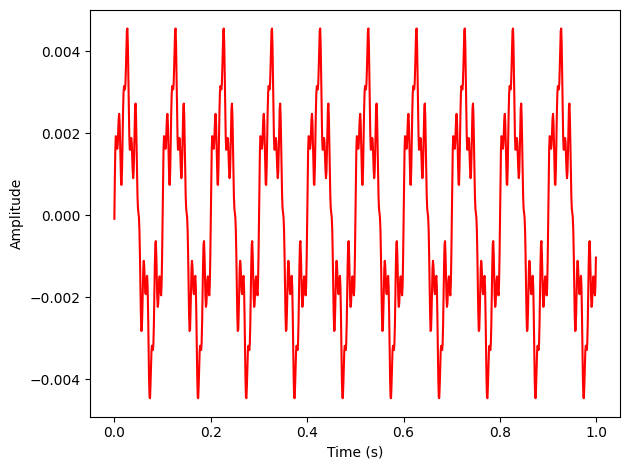

In [ ]:
# iFFT (X_denoise):.....

Nâng cao: # Với 1 tín hiệu bất kỳ, chúng ta sẽ chọn ngưỡng như thế nào
Thử với 1 file dữ liệu cụ thể (VD file âm thanh chẳng hạn), thêm nhiễu sau đó khử nhiễu trên file âm thanh đó? Nghe lại và đánh giá

In [ ]:
# Code here....
